In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
results_path = 'Results_ALL.xlsx'
results_df = pd.read_excel(results_path, dtype = str)

In [3]:
results_df = results_df.rename(columns={
    'Hora de inicio': 'start_date',
    'Hora de finalización': 'end_date',
    'Selecciona la asignatura':'subject',
    'Selecciona la pregunta': 'question',
    'Conversación con ChatGPT': 'conversation_ChatGPT',
    '¿Cuántas preguntas has realizado a ChatGPT para obtener la mejor respuesta?': 'numTries_ChatGPT',
    'Conversación con Gemini': 'conversation_Gemini',
    '¿Cuántas preguntas has realizado a Gemini para obtener la mejor respuesta?': 'numTries_Gemini',
    'Conversación con Copilot': 'conversation_Copilot',
    '¿Cuántas preguntas has realizado a Copilot para obtener la mejor respuesta?': 'numTries_Copilot',
    '¿Te ha ayudado ChatGPT a responder a la pregunta?': 'rating_ChatGPT',
    '¿Te ha ayudado Gemini a responder a la pregunta?': 'rating_Gemini',
    '¿Te ha ayudado Copilot a responder a la pregunta?': 'rating_Copilot',
    'Indica tu respuesta a la pregunta':'final_answer'
}).drop(columns=results_df.columns, errors='ignore')

In [4]:
results_df['date'] = pd.to_datetime(results_df['start_date'], errors='coerce')
results_df.loc[(results_df["date"]>"2024-03-15") & (results_df["date"]<"2024-04-15"), "subject"] = "Lenguajes de Programación - Haskell"
results_df.loc[results_df["subject"]=="Lenguajes de Programación", "subject"] = "Lenguajes de Programación - Python"
results_df['subject'].unique()

array(['Lenguajes de Programación - Haskell',
       'Desarrollo de Aplicaciones Web',
       'Desarrollo de Aplicaciones Distribuidas',
       'Estructura de datos II', 'Lenguajes de Programación - Python',
       'Ampliación de Ingeniería del Software'], dtype=object)

In [5]:
# First attempt
# results_df = results_df[results_df['subject'].isin(["Ampliación de Ingeniería del Software","Desarrollo de Aplicaciones Distribuidas"])]

In [6]:
# Final attempt
results_df = results_df[results_df['subject'].isin([
       'Lenguajes de Programación - Haskell',
       'Desarrollo de Aplicaciones Web',
       'Desarrollo de Aplicaciones Distribuidas',
       'Estructura de datos II',
       'Ampliación de Ingeniería del Software'
])]

In [7]:
results_df['numTries_ChatGPT'] = results_df['numTries_ChatGPT'].astype(int)
results_df['numTries_Gemini'] = results_df['numTries_Gemini'].astype(int)
results_df['numTries_Copilot'] = results_df['numTries_Copilot'].astype(int)

In [8]:
#grouped_questions = ["Pregunta corta", "Pregunta de explicar código", "Pregunta de escribir código"]
grouped_questions = ["Short Questions", "Interpreting source code questions", "Code writing questions"]
def group_questions(question):
    if question in ["Pregunta 1", "Pregunta 2"]: return grouped_questions[0]
    if question in ["Pregunta 3", "Pregunta 4"]: return grouped_questions[1]
    if question in ["Pregunta 5", "Pregunta 6"]: return grouped_questions[2]
results_df['question_grouped'] = results_df['question'].apply(group_questions)

In [9]:
response_map = {
 'Si. Me ha dado la mejor respuesta' : 'Mejor respuesta',
 'Si. Me ha dado una respuesta correcta, pero menos completa que otras IAs': 'Correcta, pero no tan completa',
 'No. Me ha contestado correctamente, pero no responde a la pregunta que le he hecho': 'No responde a la pregunta',
 'No. Me ha contestado de forma errónea': 'Responde incorrectamente'
}
results_df['rating_ChatGPT_reduced'] = results_df['rating_ChatGPT'].apply(lambda rating: response_map[rating])
results_df['rating_Gemini_reduced'] = results_df['rating_Gemini'].apply(lambda rating: response_map[rating])
results_df['rating_Copilot_reduced'] = results_df['rating_Copilot'].apply(lambda rating: response_map[rating])

In [10]:
results_df.head()

,start_date,end_date,subject,question,conversation_ChatGPT,numTries_ChatGPT,conversation_Gemini,numTries_Gemini,conversation_Copilot,numTries_Copilot,rating_ChatGPT,rating_Copilot,rating_Gemini,date,question_grouped,rating_ChatGPT_reduced,rating_Gemini_reduced,rating_Copilot_reduced
0,2024-03-15 13:26:03,2024-03-15 13:31:23,Lenguajes de Programación - Haskell,Pregunta 1,Pregunta 1 (Pregunta de teoría con respuesta d...,3,Pregunta 1 (Pregunta de teoría con respuesta d...,1,Pregunta 1 (Pregunta de teoría con respuesta d...,1,Si. Me ha dado la mejor respuesta,"Si. Me ha dado una respuesta correcta, pero me...","Si. Me ha dado una respuesta correcta, pero me...",2024-03-15 13:26:03,Short Questions,Mejor respuesta,"Correcta, pero no tan completa","Correcta, pero no tan completa"
1,2024-03-15 13:19:25,2024-03-15 13:32:30,Lenguajes de Programación - Haskell,Pregunta 1,User ¿Qué es la aplicación de una función en...,1,¿Qué es la aplicación de una función en Haskel...,1,¿Qué es la aplicación de una función en Haskel...,3,"Si. Me ha dado una respuesta correcta, pero me...","Si. Me ha dado una respuesta correcta, pero me...",Si. Me ha dado la mejor respuesta,2024-03-15 13:19:25,Short Questions,"Correcta, pero no tan completa",Mejor respuesta,"Correcta, pero no tan completa"
2,2024-03-15 13:25:56,2024-03-15 13:33:42,Lenguajes de Programación - Haskell,Pregunta 1,"En Haskell, la aplicación de una función se re...",1,"En Haskell, la aplicación de una función se re...",1,La **aplicación de una función** en **Haskell*...,1,"Si. Me ha dado una respuesta correcta, pero me...",Si. Me ha dado la mejor respuesta,"Si. Me ha dado una respuesta correcta, pero me...",2024-03-15 13:25:56,Short Questions,"Correcta, pero no tan completa","Correcta, pero no tan completa",Mejor respuesta
3,2024-03-15 13:31:31,2024-03-15 13:33:54,Lenguajes de Programación - Haskell,Pregunta 1,¿Qué es la aplicación de una función en Haskel...,1,¿Qué es la aplicación de una función en Haskel...,1,¿Qué es la aplicación de una función en Haskel...,1,"Si. Me ha dado una respuesta correcta, pero me...","Si. Me ha dado una respuesta correcta, pero me...",Si. Me ha dado la mejor respuesta,2024-03-15 13:31:31,Short Questions,"Correcta, pero no tan completa",Mejor respuesta,"Correcta, pero no tan completa"
4,2024-03-15 13:27:36,2024-03-15 13:34:03,Lenguajes de Programación - Haskell,Pregunta 1,¿Qué es la aplicación de una función en Haskell?,1,¿Qué es la aplicación de una función en Haskell?,1,¿Qué es la aplicación de una función en Haskell?,1,"Si. Me ha dado una respuesta correcta, pero me...",Si. Me ha dado la mejor respuesta,Si. Me ha dado la mejor respuesta,2024-03-15 13:27:36,Short Questions,"Correcta, pero no tan completa",Mejor respuesta,Mejor respuesta


In [11]:
def numTries_perQuestion(question):
    df = results_df
    if question != 'All':
        df = results_df[results_df['question_grouped']==question]
    results = [
        question,
        df['numTries_ChatGPT'].mean(),
        df[df['numTries_Gemini']>0]['numTries_Gemini'].mean(),
        #df['numTries_Gemini'].mean(),
        df['numTries_Copilot'].mean()
    ]
    return results

# Número de preguntas hechas a cada IA (media)

Comentarios:
- Hay 13 alumnos que en Gemini tienen un 0 porque tuvieron problemas con su cuenta de Google

Observaciones preliminares:
- En general, la media de nº de preguntas para todas las IAs es de ~1.26 intentos de pregunta
- Las preguntas de escribir código (5 y 6) son las que menos preguntas de media han requerido (salvo para Copilot)

In [12]:
len(results_df[results_df['numTries_Gemini']==0])

60

In [13]:
rows = [numTries_perQuestion("All")] + [numTries_perQuestion(q) for q in grouped_questions]
pd.DataFrame(rows,columns=['Question','ChatGPT','Gemini','Copilot']).round(decimals=3)

,Question,ChatGPT,Gemini,Copilot
0,All,1.237,1.201,1.209
1,Short Questions,1.201,1.190,1.240
2,Interpreting source code questions,1.209,1.210,1.147
3,Code writing questions,1.322,1.206,1.240


In [14]:
results_df[['numTries_ChatGPT','numTries_Gemini','numTries_Copilot']].describe()

,numTries_ChatGPT,numTries_Gemini,numTries_Copilot
count,527.000000,527.000000,527.000000
mean,1.237192,1.064516,1.208729
std,0.746794,0.634566,0.599493
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000
max,10.000000,6.000000,6.000000


In [15]:
for ia in ['numTries_ChatGPT','numTries_Gemini','numTries_Copilot']:
    one_question_per = (results_df[ia][results_df[ia]==0].count() 
         / results_df[ia].count())
    print(ia, one_question_per)

numTries_ChatGPT 0.003795066413662239
numTries_Gemini 0.11385199240986717
numTries_Copilot 0.022770398481973434


# Cuánto ha ayudado cada IA en cada pregunta

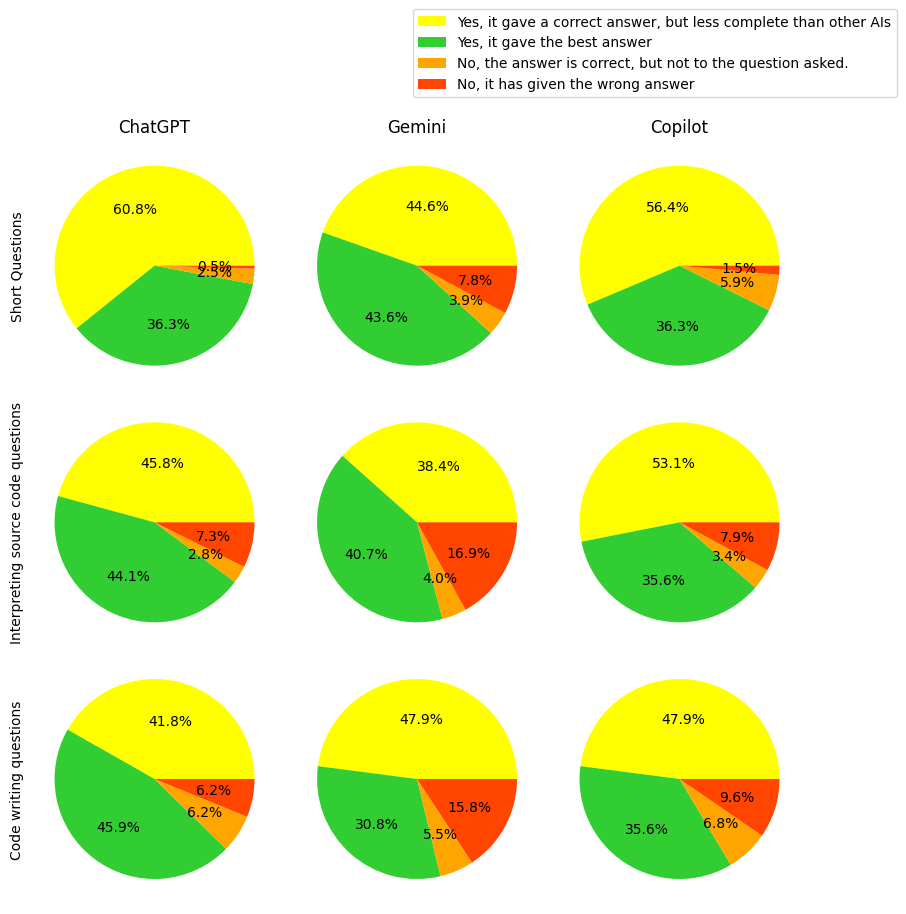

In [16]:
colors = {
    'Mejor respuesta':  'limegreen',
    'Correcta, pero no tan completa': 'yellow', 
    'No responde a la pregunta': 'orange', 
    'Responde incorrectamente': 'orangered'
}

def ia_rating_pieChart(ia, question, ax):
    df = results_df[results_df['question_grouped']==question].groupby(['rating_'+ia+'_reduced']).count()
    title = ia if question == grouped_questions[0] else ""
    ylabel = question if ia == "ChatGPT" else ""
    showLegend = question == grouped_questions[2] and ia == "Copilot"
    df.plot.pie(
        y='question_grouped', ylabel=ylabel, autopct='%1.1f%%', labels=None,#labeldistance=None,
        title=title,
        ax=ax, legend=showLegend, colors=[colors[name] for name in df.index]
    )
    if showLegend: 
        # SPANISH ax.legend(df.index,loc='lower center', bbox_to_anchor=(0.4, 3.2, 0, 0))
        ax.legend([
            "Yes, it gave a correct answer, but less complete than other AIs", 
            "Yes, it gave the best answer", 
            "No, the answer is correct, but not to the question asked.",
            "No, it has given the wrong answer"
        ],loc='lower center', bbox_to_anchor=(0.4, 3.2, 0, 0))
    return df
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
fig.subplots_adjust(hspace=0, wspace=0.05)

row,col = 0,0
for question in grouped_questions:
    for ia in ['ChatGPT','Gemini','Copilot']:
        ia_rating_pieChart(ia, question, axes[row,col])
        if col == 2:
            col = 0
            row = row + 1
        else:
            col+=1
plt.savefig('IA_comparative_per_question_type.png', bbox_inches='tight')